# PCA and t-SNE - Proof of concept

This notebook reads the stored training and testing data generated.
First, a principal component analysis (PCA) is applied for dimensionality reduction purposes. The number of components that at least explain the 95 % of the variance is then selected.

In addition, there is a t-SNE performance to improve data visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from phd.experimentsDef import AuditoryFeaturesResult
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold
import seaborn as sns
import phd
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import sys
np.set_printoptions(threshold=sys.maxsize)

sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 3})
phd.plots.setup(figsize=(5.5, 4.5))
sns.set_style({"axes.spines.right": False})
sns.set_style({"axes.spines.top": False})

# Loading results

Just load the datasets (X,Y, and the binarized labels)

In [2]:
X, Y, Y_train_binarized, Y_test_binarized, _,_,_,_ = phd.saveFiles.load_results(key='ncc-b=1.019-power=3.000/consonants,nfilters32,ncepstra13,seed20')

The file consonants,nfilters32,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))


Plotting features with a scatter plot

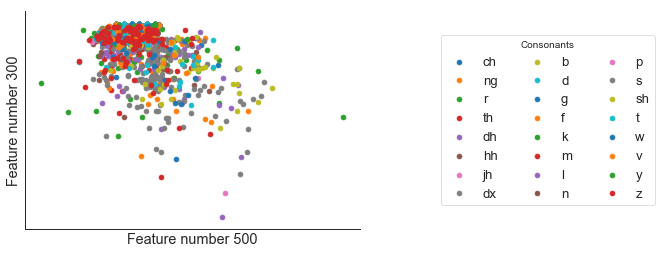

In [6]:
consonants_labels=set(Y)

fig = plt.figure()
# Plot the training points
for label in consonants_labels:
    plt.scatter(X[Y==label,500], X[Y==label,300],label=label)

plt.xticks(())
plt.yticks(())
plt.xlabel('Feature number 500')
plt.ylabel('Feature number 300')
lgd=plt.legend(loc='center right', bbox_to_anchor=(1.9, 0.5), fancybox=True, 
           shadow=False, title='Consonants',ncol=3)

#phd.plots.savefig(plt, 'results/pca', 'no-pca')
#fig.savefig('plots/results/pca/no-pca.svg', bbox_extra_artists=(lgd,), bbox_inches='tight', format='svg')

# Performing PCA

1st. scale the data and choose the number of components (in this case I select 1000 as first step).
2nd. plot the cumulative explained variance as a function of the number of components.
3rd. select the number of components that at least explain the 90 % of the variance and perform PCA with the selected number.

1st. scale the data and choose the number of components (in this case I select 1000 as first step).

In [8]:
n_comp, n_comp_scaled, cev, cev_scaled = phd.methodsTFM.PCA_scaled_noscaled_components(X,1000,0.95)

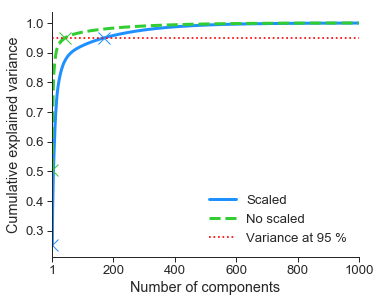

In [12]:
fig = plt.figure(figsize=(5.5, 4.5))
x1=np.linspace(1,len(cev_scaled),len(cev_scaled))
x2=np.linspace(1,len(cev),len(cev))
plt.plot(x1,cev_scaled, 'dodgerblue',label='Scaled')
plt.plot(x2,cev,'limegreen', linestyle='--',label='No scaled')

#plot initial points:
plt.plot(x1[0],cev_scaled[0], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[0],cev[0], 'x', markersize=12, color='limegreen')

plt.axhline(y=0.95, color='r', linestyle=':', lw = 1.7, label='Variance at 95 %')

#plot points at 95% variance:
plt.plot(x1[n_comp_scaled],cev_scaled[n_comp_scaled], 'x', markersize=12, color='dodgerblue')
plt.plot(x2[n_comp],cev[n_comp], 'x', markersize=12, color='limegreen')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

x_ticks=np.arange(0,1001,200)
x_ticks[0] = 1

plt.xticks(x_ticks);
plt.xlim(0,1000)
plt.gca().set_xlim(right=1000)
lgd=plt.legend(loc='lower right', fancybox=True, shadow=False, frameon=False)
plt.show()

fig.savefig('/Volumes/LeandroLV/TFM/results/figures_def/PCA-scaled-noscaled-V2.svg',
           bbox_inches='tight', format='svg')

# Number of components comparison


Here I show how many components are needed to explain the 98% of the variance, for data scaled and non-scaled.

In [4]:
n_cepstra_vector = np.ones(31, dtype=int)
n_cepstra_vector[:12] = np.arange(12, dtype=int)+2
n_cepstra_vector[12:] = n_cepstra_vector[12:]*13

n_filters_vector = np.arange(31, dtype=int)+2
ncomp = np.zeros(len(n_filters_vector))
ncomp_scaled = np.zeros(len(n_filters_vector))

for x in np.arange(len(n_filters_vector)):
    path='/Volumes/LeandroLV/TFM/results/ncc-b=1.019-power=3.000/consonants,nfilters%d,ncepstra%d,seed20' %(n_filters_vector[x],n_cepstra_vector[x])
    X, Y, Y_train_binarized, Y_test_binarized,_,_,_,_ = phd.saveFiles.load_results(path)
    if X.shape[1]<=1000:
        ncomp[x], ncomp_scaled[x], _, _ = phd.methodsTFM.PCA_scaled_noscaled_components(X,X.shape[1],0.95)
    else:    
        ncomp[x], ncomp_scaled[x], _, _ = phd.methodsTFM.PCA_scaled_noscaled_components(X,1000,0.95)

The file consonants,nfilters2,ncepstra2,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 430))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 430))
('X_test size: ', (660,))
('Full dataset: ', (1937, 430))
('Full labels: ', (1937,))
The file consonants,nfilters3,ncepstra3,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 645))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 645))
('X_test size: ', (660,))
('Full dataset: ', (1937, 645))
('Full labels: ', (1937,))
The file consonants,nfilters4,ncepstra4,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 860))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 860))
('X_test size: ', (660,))
('Full dataset: ', (1937

('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))
The file consonants,nfilters26,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))
The file consonants,nfilters27,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_labels/y_test_binarized
y_labels/y_train_binarized
('X_train size: ', (1277, 2795))
('Y_train size: ', (1277,))
('Y_test size: ', (660, 2795))
('X_test size: ', (660,))
('Full dataset: ', (1937, 2795))
('Full labels: ', (1937,))
The file consonants,nfilters28,ncepstra13,seed20.h5 has the next items:
data_ncc
data_ncc/test
data_ncc/train
y_labels
y_l

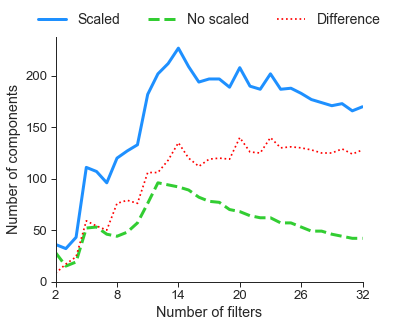

In [11]:
fig = plt.figure(figsize=(5.5, 4.5))
ax = plt.gca()

plt.plot(n_filters_vector,ncomp_scaled,'dodgerblue',label='Scaled')
plt.plot(n_filters_vector,ncomp,'limegreen', linestyle='--',label='No scaled')
plt.plot(n_filters_vector,ncomp_scaled-ncomp,linestyle=':',lw=1.7,color='red',
        label='Difference')


plt.ylabel('Number of components')
plt.xlabel('Number of filters')
ax.set_xticks(np.linspace(2,32,6, dtype=int))
ax.set_xticklabels(np.linspace(2,32,6, dtype=int))
plt.ylim(0)
plt.xlim(2,32)

#lgd=plt.legend(loc='center right',bbox_to_anchor=(0.6, 0.5, 1, 0), fancybox=True, shadow=False, frameon=False)
lg=plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), fancybox=True, 
              shadow=False, frameon=False, prop={'size': 14})
plt.show()


fig.savefig('/Volumes/LeandroLV/TFM/Thesis/Figures/results/PCA-scaled-noscaled-filters-95CEV.svg',
           bbox_inches='tight', format='svg')

# Scatter plot visualization

PCA is good for dimensionality reduction but not for visualization. That's why a good idea is to apply a t-SNE for visualisation purposes.

(0.9800881987914979, 162)


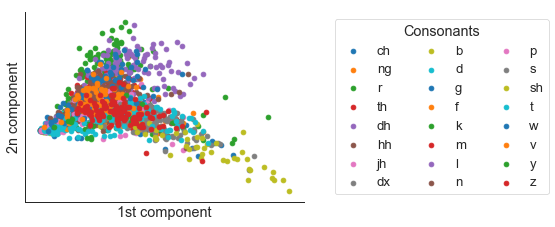

In [105]:
value, n_components = find_nearest_forPCA(cumulative_variance,0.98)
print(value,n_components)

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_scaled)

h = .02  # step size in the mesh

x_min, x_max = principalComponents[:,0].min()-.05, principalComponents[:,0].max()+.05
y_min, y_max = principalComponents[:,1].min()-.05, principalComponents[:,1].max()+.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
i=1
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

consonants_labels=set(Y)
fig = plt.figure()
# Plot the training points
for label in consonants_labels:
    plt.scatter(principalComponents[Y==label,0], principalComponents[Y==label,1], 
                cmap=cm_bright, label=label)#label='Consonant %s' %label)
    
plt.xticks(())
plt.yticks(())
plt.xlabel('1st component')
plt.ylabel('2n component')
lgd = plt.legend(loc='center right', bbox_to_anchor=(1.9, 0.5), fancybox=True, shadow=False, 
                 title='Consonants',ncol=3)

fig.savefig('plots/results/pca/pca-scaled-98variance.svg', bbox_extra_artists=(lgd,), bbox_inches='tight', format='svg')

(0.9800881987914979, 162)


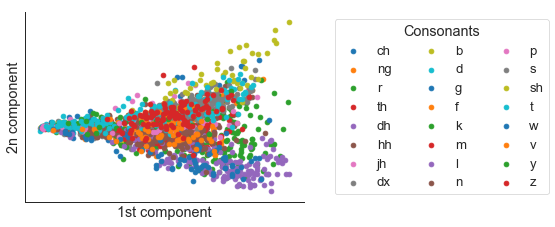

In [109]:
value, n_components = find_nearest_forPCA(cumulative_variance,0.98)
print(value,n_components)

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = principalComponents[:,0].min()-.05, principalComponents[:,0].max()+.05
y_min, y_max = principalComponents[:,1].min()-.05, principalComponents[:,1].max()+.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
i=1
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

consonants_labels=set(Y)
fig = plt.figure()
# Plot the training points
for label in consonants_labels:
    plt.scatter(principalComponents[Y==label,0], principalComponents[Y==label,1], 
                cmap=cm_bright, label=label)#label='Consonant %s' %label)
    
plt.xticks(())
plt.yticks(())
plt.xlabel('1st component')
plt.ylabel('2n component')
lgd = plt.legend(loc='center right', bbox_to_anchor=(1.9, 0.5), fancybox=True, shadow=False, 
                 title='Consonants',ncol=3)

fig.savefig('plots/results/pca/pca-noscaled-98variance.svg', bbox_extra_artists=(lgd,), bbox_inches='tight', format='svg')

t-SNE performance for visualization purposes.

In [12]:
tsne = manifold.TSNE(n_components=2, verbose=0, perplexity=100)
tsne_pca_results = tsne.fit_transform(principalComponents)

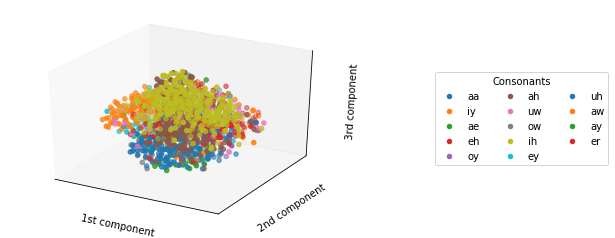

In [11]:
ax2 = plt.subplot(projection='3d')
for label in consonants_labels:
    ax2.scatter3D(tsne_pca_results[Y==label,0],tsne_pca_results[Y==label,1],
                  tsne_pca_results[Y==label,2], label=label)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_zticks(())
ax2.set_xlabel(('1st component'))
ax2.set_ylabel(('2nd component'))
ax2.set_zlabel(('3rd component'))
ax2.legend(loc='center right', bbox_to_anchor=(1.8, 0.5), fancybox=True, 
          shadow=False, title='Consonants',ncol=3)

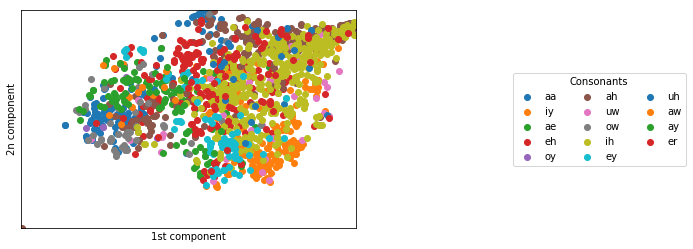

In [15]:
h = .02  # step size in the mesh

x_min, x_max = tsne_pca_results[:,0].min()-.05, tsne_pca_results[:,0].max()+.05
y_min, y_max = tsne_pca_results[:,1].min()-.05, tsne_pca_results[:,1].max()+.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
i=1
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot()

consonants_labels=set(Y)

# Plot the training points
for label in consonants_labels:
    ax.scatter(tsne_pca_results[Y==label,0], tsne_pca_results[Y==label,1], 
               cmap=cm_bright, label=label)#label='Consonant %s' %label)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlabel('1st component')
ax.set_ylabel('2n component')
ax.legend(loc='center right', bbox_to_anchor=(2, 0.5), fancybox=True, 
          shadow=False, title='Consonants',ncol=3)